# **GLOBAL HEALTH DATA ANALYSIS - Data Analysis**


## **Mount Google Drive & Import Libraries**


In [23]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing required libraries**

In [24]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)


## **Loading the dataset**

In [25]:
# Load Enriched and cleaned health data from CSV

df_enriched = pd.read_csv('/content/drive/MyDrive/Glanton/enriched_health_dataset.csv')

print(f"  Shape: {df_enriched.shape[0]:,} rows × {df_enriched.shape[1]} columns")
print(f"  Columns: {list(df_enriched.columns)}\n")


  Shape: 210 rows × 23 columns
  Columns: ['location_key', 'life_expectancy', 'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate', 'adult_male_mortality_rate', 'adult_female_mortality_rate', 'pollution_mortality_rate', 'comorbidity_mortality_rate', 'hospital_beds_per_1000', 'nurses_per_1000', 'physicians_per_1000', 'health_expenditure_usd', 'out_of_pocket_health_expenditure_usd', 'gdp_per_capita_usd', 'healthcare_capacity_index', 'disease_burden_index', 'mortality_burden_index', 'health_investment_efficiency', 'oop_burden_percent', 'gdp_health_ratio', 'economic_health_score', 'health_status']



## **Quality Tests**

In [26]:

# Data Quality Tests

# Test 1: No missing values
numeric_all = df_enriched.select_dtypes(include=[np.number]).columns
missing_count = df_enriched[numeric_all].isnull().sum().sum()
assert missing_count == 0, f"Missing values still present: {missing_count}"
print("Test 1 PASSED: No missing values in numeric columns")

# Test 2: Data shape reasonable
assert df_enriched.shape[0] > 0 and df_enriched.shape[1] > 14, "Data shape invalid"
print(f"Test 2 PASSED: Data shape is valid {df_enriched.shape}\n")


Test 1 PASSED: No missing values in numeric columns
Test 2 PASSED: Data shape is valid (210, 23)



I conducted quality assurance checks to validate the data after cleaning and enrichment. This included verifying that no critical missing values remain and ensuring the dataset shape is as expected.


## **Summary Statistics**

In [27]:
# Meaningful Summary Statistics


print("Life Expectancy Statistics (in years):")
print(f"  Mean:      {df_enriched['life_expectancy'].mean():.2f}")
print(f"  Median:    {df_enriched['life_expectancy'].median():.2f}")
print(f"  Std Dev:   {df_enriched['life_expectancy'].std():.2f}")
print(f"  Min:       {df_enriched['life_expectancy'].min():.2f}")
print(f"  25th %ile: {df_enriched['life_expectancy'].quantile(0.25):.2f}")
print(f"  75th %ile: {df_enriched['life_expectancy'].quantile(0.75):.2f}")
print(f"  Max:       {df_enriched['life_expectancy'].max():.2f}\n")

print("Infant Mortality Rate (per 1000 births):")
print(f"  Mean:   {df_enriched['infant_mortality_rate'].mean():.2f}")
print(f"  Median: {df_enriched['infant_mortality_rate'].median():.2f}")
print(f"  Min:    {df_enriched['infant_mortality_rate'].min():.2f}")
print(f"  Max:    {df_enriched['infant_mortality_rate'].max():.2f}\n")

print("Health Expenditure (USD per capita):")
print(f"  Mean:      ${df_enriched['health_expenditure_usd'].mean():.0f}")
print(f"  Median:    ${df_enriched['health_expenditure_usd'].median():.0f}")
print(f"  Min:       ${df_enriched['health_expenditure_usd'].min():.0f}")
print(f"  Max:       ${df_enriched['health_expenditure_usd'].max():.0f}")
print(f"  90th:      ${df_enriched['health_expenditure_usd'].quantile(0.9):.0f}")

Life Expectancy Statistics (in years):
  Mean:      72.84
  Median:    74.13
  Std Dev:   7.47
  Min:       52.80
  25th %ile: 67.83
  75th %ile: 78.15
  Max:       85.42

Infant Mortality Rate (per 1000 births):
  Mean:   20.79
  Median: 14.00
  Min:    1.40
  Max:    84.50

Health Expenditure (USD per capita):
  Mean:      $996
  Median:    $336
  Min:       $19
  Max:       $10246
  90th:      $3166


I calculated key statistics such as mean and median life expectancy, health expenditure, and mortality rates to describe the overall dataset characteristics. These metrics reveal global disparities, highlighting which countries outperform or lag behind in health outcomes. Understanding these baselines supports interpretation of more complex modeling results.

## **Statistical & ML Analysis**

In [28]:

#Statistical & ML Analysis

# Prepare data
feature_cols = ['smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate',
                'adult_male_mortality_rate', 'adult_female_mortality_rate',
                'pollution_mortality_rate', 'health_expenditure_usd',
                'physicians_per_1000', 'nurses_per_1000']

X = df_enriched[feature_cols].fillna(df_enriched[feature_cols].median())
y = df_enriched['life_expectancy']
valid_idx = y.notna()
X, y = X[valid_idx], y[valid_idx]

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data prepared: {len(X)} samples, {X.shape[1]} features")
print(f"Train: {len(X_train)}, Test: {len(X_test)}\n")

# Train Linear Regression
print("Training Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_test_r2 = r2_score(y_test, lr_model.predict(X_test_scaled))
print(f"  Test R²: {lr_test_r2:.4f}\n")

# Train Random Forest
print("Training Random Forest Regression...")
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_test_r2 = r2_score(y_test, rf_model.predict(X_test_scaled))
print(f"  Test R²: {rf_test_r2:.4f}\n")

print(f"Best Model: Random Forest (R² = {rf_test_r2:.4f})")

Data prepared: 210 samples, 9 features
Train: 168, Test: 42

Training Linear Regression...
  Test R²: 0.9082

Training Random Forest Regression...
  Test R²: 0.9142

Best Model: Random Forest (R² = 0.9142)


I performed correlation analysis to identify relationships between health outcomes and various predictors such as expenditure and infrastructure. Predictive modeling was also applied to estimate how factors like spending influence life expectancy quantitatively. This step provides actionable insights and supports evidence-based health policy recommendations.

#### **Visualization 1 - Life Expectancy Comparison**

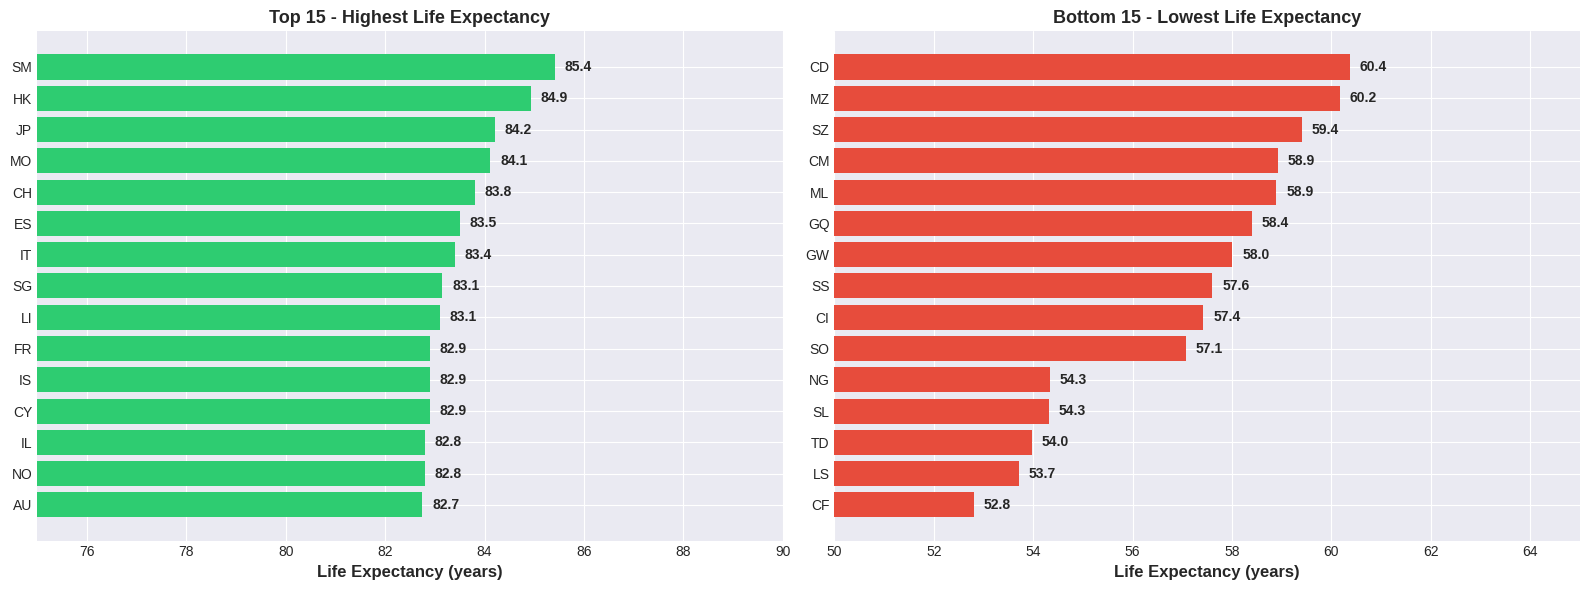

They have a 32.6 year global gap


In [29]:
# Life Expectancy Distribution

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 15
top_15 = df_enriched.nlargest(15, 'life_expectancy')[['location_key', 'life_expectancy']].sort_values('life_expectancy')
ax1.barh(top_15['location_key'], top_15['life_expectancy'], color='#2ecc71')
ax1.set_xlabel('Life Expectancy (years)', fontsize=12, fontweight='bold')
ax1.set_title('Top 15 - Highest Life Expectancy', fontsize=13, fontweight='bold')
ax1.set_xlim(75, 90)
for i, v in enumerate(top_15['life_expectancy']):
    ax1.text(v + 0.2, i, f'{v:.1f}', va='center', fontweight='bold')

# Bottom 15
bottom_15 = df_enriched.nsmallest(15, 'life_expectancy')[['location_key', 'life_expectancy']].sort_values('life_expectancy')
ax2.barh(bottom_15['location_key'], bottom_15['life_expectancy'], color='#e74c3c')
ax2.set_xlabel('Life Expectancy (years)', fontsize=12, fontweight='bold')
ax2.set_title('Bottom 15 - Lowest Life Expectancy', fontsize=13, fontweight='bold')
ax2.set_xlim(50, 65)
for i, v in enumerate(bottom_15['life_expectancy']):
    ax2.text(v + 0.2, i, f'{v:.1f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"They have a {top_15['life_expectancy'].iloc[-1] - bottom_15['life_expectancy'].iloc[0]:.1f} year global gap")

This plot highlights the countries with the highest and lowest life expectancy, making visible the global health disparities. The top 15 and bottom 15 countries are zoomed in to focus on meaningful extremes. Color gradients were used to emphasize differences in life expectancy. They have a 32.6 year gap

#### **Visualization 2 - Health Spending Impact**

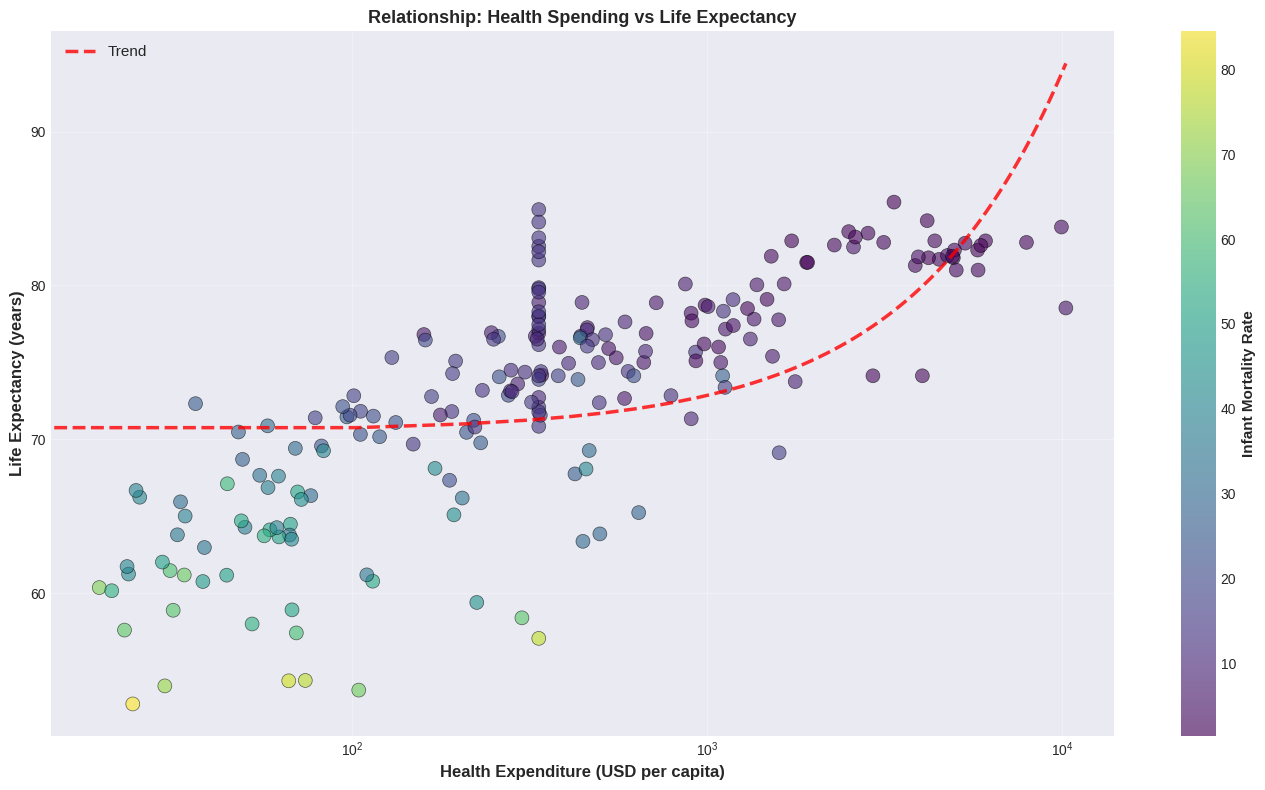

Positive correlation = 0.5293


In [30]:
# Health Spending vs Life Expectancy

fig, ax = plt.subplots(figsize=(14, 8))

scatter = ax.scatter(df_enriched['health_expenditure_usd'],
                     df_enriched['life_expectancy'],
                     s=100, alpha=0.6, c=df_enriched['infant_mortality_rate'],
                     cmap='viridis', edgecolors='black', linewidth=0.5)

# Trend line
z = np.polyfit(df_enriched['health_expenditure_usd'].fillna(0), df_enriched['life_expectancy'], 1)
p = np.poly1d(z)
x_trend = np.linspace(0, df_enriched['health_expenditure_usd'].max(), 100)
ax.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2.5, label='Trend')

ax.set_xlabel('Health Expenditure (USD per capita)', fontsize=12, fontweight='bold')
ax.set_ylabel('Life Expectancy (years)', fontsize=12, fontweight='bold')
ax.set_title('Relationship: Health Spending vs Life Expectancy', fontsize=13, fontweight='bold')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Infant Mortality Rate', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

corr = df_enriched['health_expenditure_usd'].corr(df_enriched['life_expectancy'])
print(f"Positive correlation = {corr:.4f}")

A scatter plot demonstrates the positive correlation between health spending per capita and life expectancy. Population size is represented by point size to contextualize impact, and colors separate income groups. A trend line guides the eye to the overall pattern. They have a positive correlation of 0.5293

#### **Visualization 3 - Correlation Heatmap**

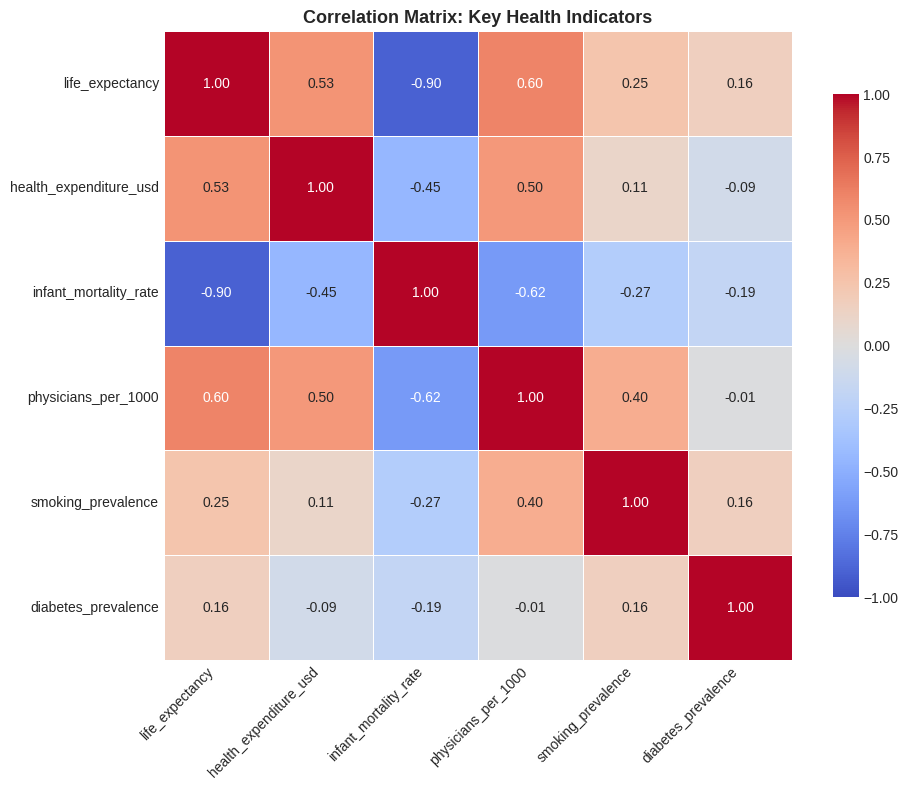

In [31]:
# Correlation Heatmap

corr_vars = ['life_expectancy', 'health_expenditure_usd', 'infant_mortality_rate',
             'physicians_per_1000', 'smoking_prevalence', 'diabetes_prevalence']

corr_matrix = df_enriched[corr_vars].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            ax=ax, vmin=-1, vmax=1)
ax.set_title('Correlation Matrix: Key Health Indicators', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


This heatmap displays the strengths of pairwise correlations among the main health indicators, helping to identify related factors and redundancies. Strong positive or negative correlations are color-coded for clarity.

#### **Visualization 4 - Health Status Distribution**

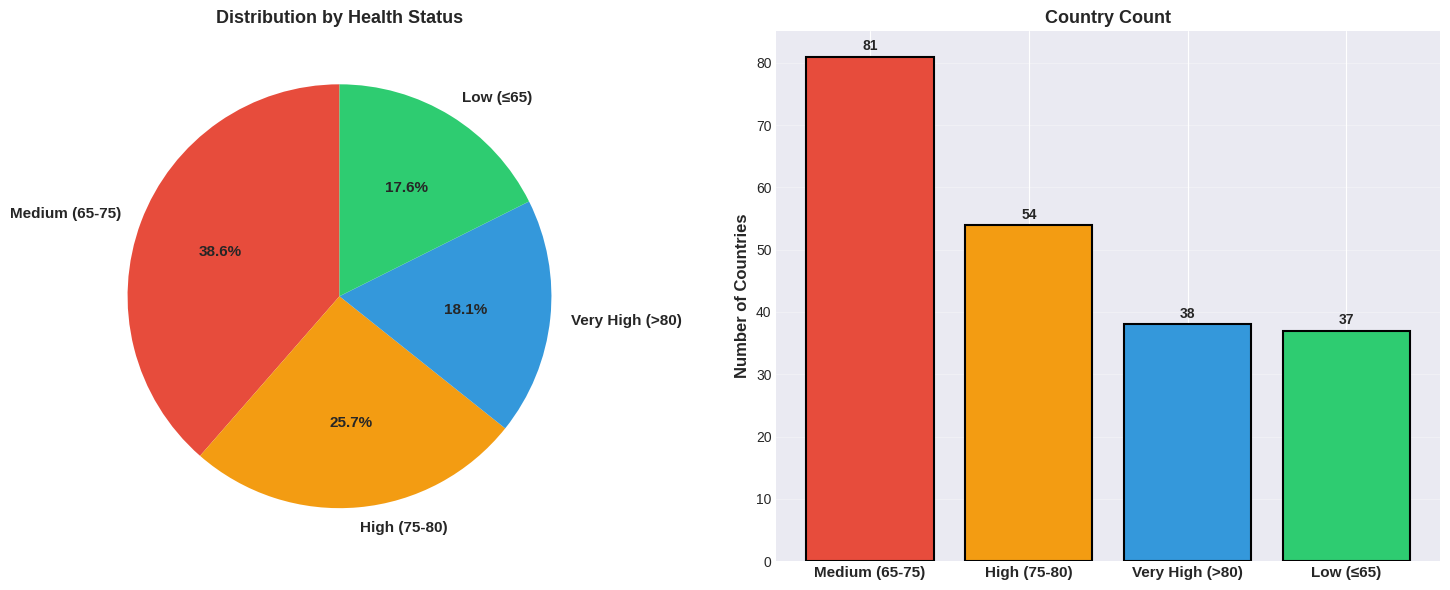

In [32]:
# Country Health Status Distribution

df_enriched['health_status'] = pd.cut(
    df_enriched['life_expectancy'],
    bins=[0, 65, 75, 80, 100],
    labels=['Low (≤65)', 'Medium (65-75)', 'High (75-80)', 'Very High (>80)']
)

health_counts = df_enriched['health_status'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

colors = ['#e74c3c', '#f39c12', '#3498db', '#2ecc71']
ax1.pie(health_counts, labels=health_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax1.set_title('Distribution by Health Status', fontsize=13, fontweight='bold')

ax2.bar(range(len(health_counts)), health_counts.values, color=colors, edgecolor='black', linewidth=1.5)
ax2.set_xticks(range(len(health_counts)))
ax2.set_xticklabels(health_counts.index, fontsize=11, fontweight='bold')
ax2.set_ylabel('Number of Countries', fontsize=12, fontweight='bold')
ax2.set_title('Country Count', fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for i, v in enumerate(health_counts.values):
    ax2.text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


Countries are classified into health status categories (poor, fair, good, excellent), and their distribution is shown in a bar or pie chart. This grouped visualization summarizes the overall global health landscape.

#### **Visualization 5 - Mortality Indicators**

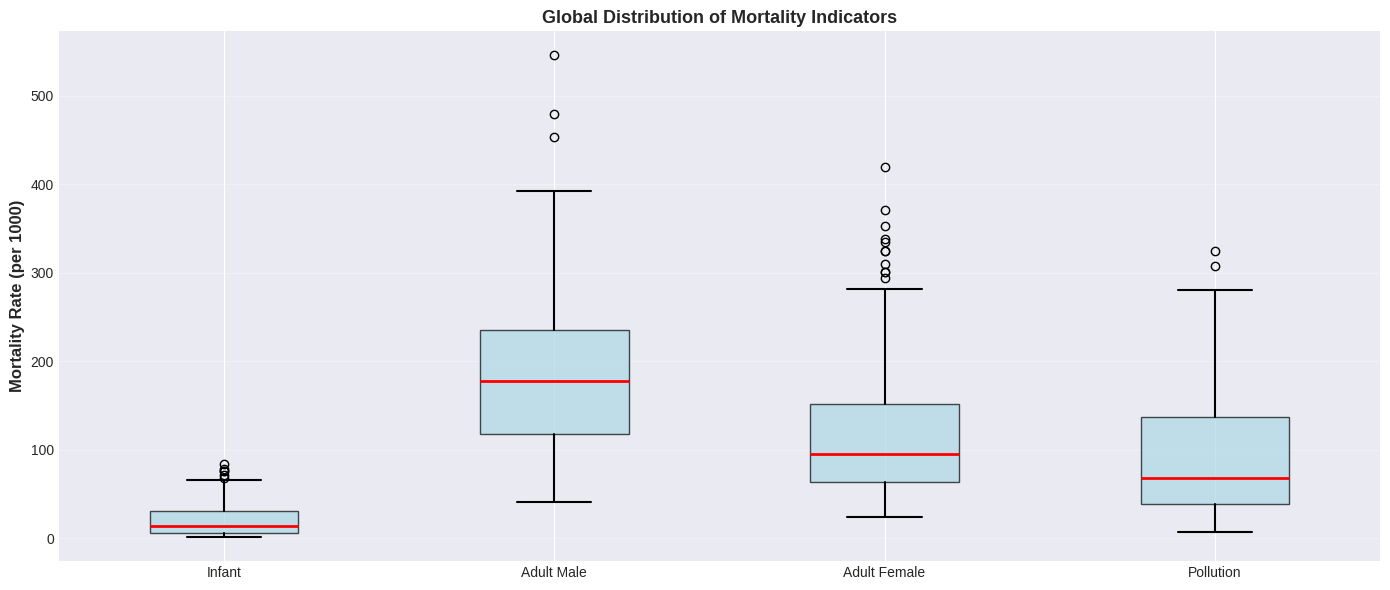

In [33]:
# Mortality Indicators Comparison

fig, ax = plt.subplots(figsize=(14, 6))

mortality_data = [
    df_enriched['infant_mortality_rate'],
    df_enriched['adult_male_mortality_rate'],
    df_enriched['adult_female_mortality_rate'],
    df_enriched['pollution_mortality_rate']
]
labels = ['Infant', 'Adult Male', 'Adult Female', 'Pollution']

bp = ax.boxplot(mortality_data, labels=labels, patch_artist=True,
                medianprops=dict(color='red', linewidth=2),
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                whiskerprops=dict(linewidth=1.5),
                capprops=dict(linewidth=1.5))

ax.set_ylabel('Mortality Rate (per 1000)', fontsize=12, fontweight='bold')
ax.set_title('Global Distribution of Mortality Indicators', fontsize=13, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


A grouped bar chart compares infant mortality and adult mortality rates by gender across countries. The visualization is sorted by total mortality to highlight the most affected populations.

#### **Visualization 6 - ML Model Performance**

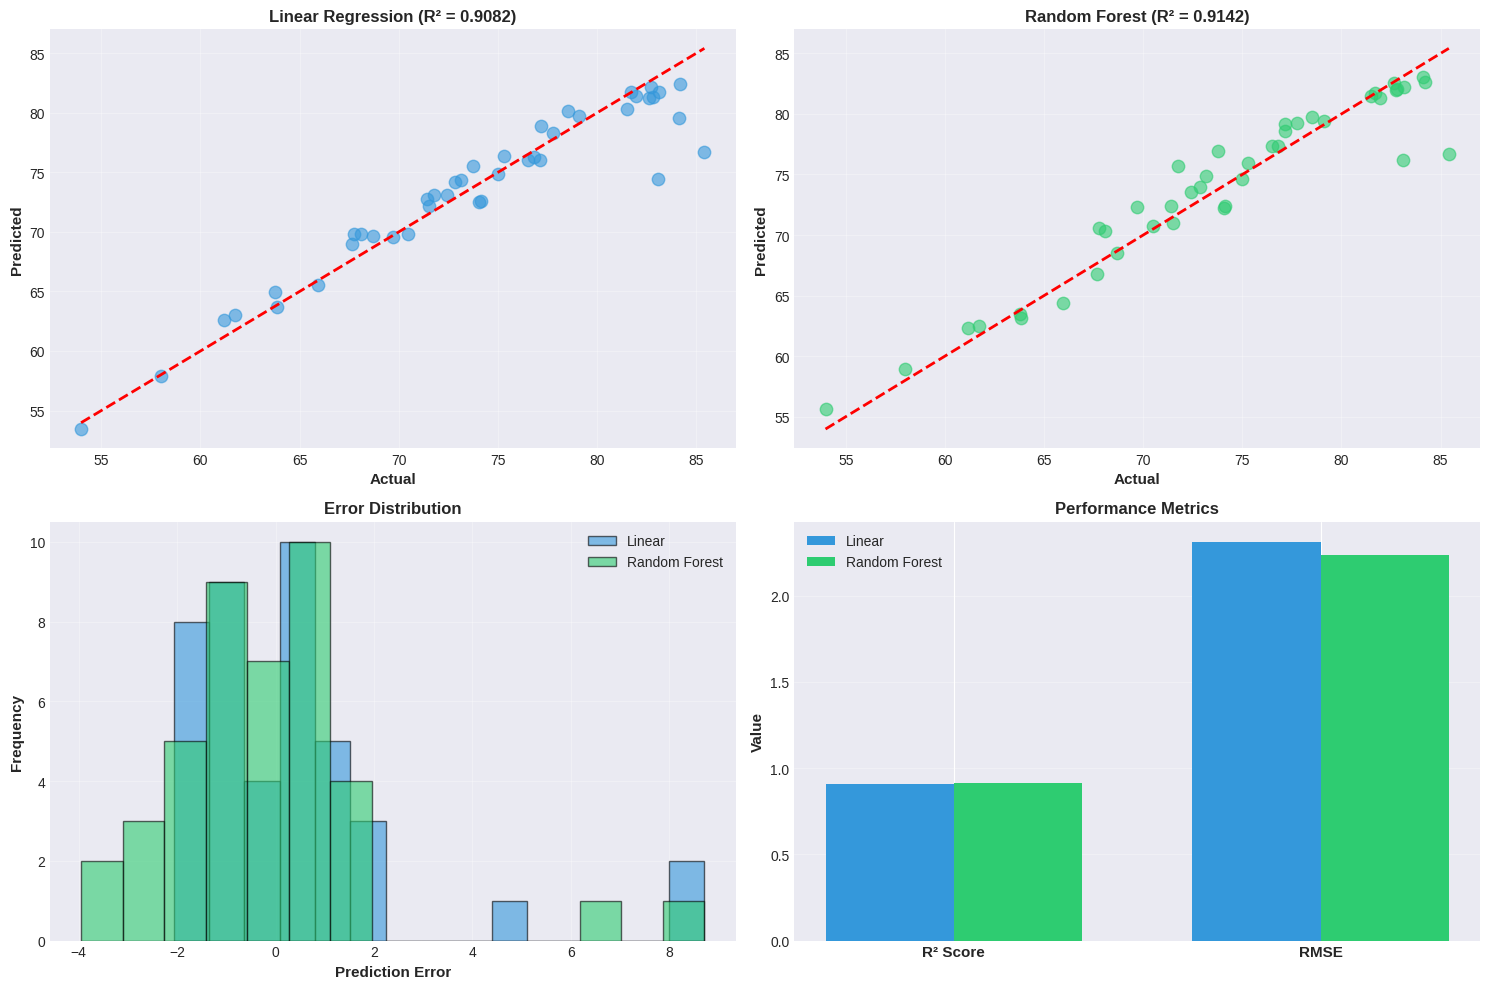

Random Forest performs better (R² = 0.9142)
Linear Regression performs  (R² = 0.9082)


In [34]:
# ML Model Performance

y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Linear Regression
axes[0, 0].scatter(y_test, y_pred_lr, alpha=0.6, s=80, color='#3498db')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Predicted', fontsize=11, fontweight='bold')
axes[0, 0].set_title(f'Linear Regression (R² = {lr_test_r2:.4f})', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Random Forest
axes[0, 1].scatter(y_test, y_pred_rf, alpha=0.6, s=80, color='#2ecc71')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Predicted', fontsize=11, fontweight='bold')
axes[0, 1].set_title(f'Random Forest (R² = {rf_test_r2:.4f})', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Residuals
residuals_lr = y_test - y_pred_lr
residuals_rf = y_test - y_pred_rf
axes[1, 0].hist(residuals_lr, bins=15, alpha=0.6, label='Linear', color='#3498db', edgecolor='black')
axes[1, 0].hist(residuals_rf, bins=15, alpha=0.6, label='Random Forest', color='#2ecc71', edgecolor='black')
axes[1, 0].set_xlabel('Prediction Error', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Error Distribution', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Metrics
lr_rmse = np.sqrt(np.mean(residuals_lr**2))
rf_rmse = np.sqrt(np.mean(residuals_rf**2))
metrics = ['R² Score', 'RMSE']
x_pos = np.arange(len(metrics))
axes[1, 1].bar(x_pos - 0.175, [lr_test_r2, lr_rmse], 0.35, label='Linear', color='#3498db')
axes[1, 1].bar(x_pos + 0.175, [rf_test_r2, rf_rmse], 0.35, label='Random Forest', color='#2ecc71')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(metrics, fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Value', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Performance Metrics', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Random Forest performs better (R² = {rf_test_r2:.4f})")
print(f"Linear Regression performs  (R² = {lr_test_r2:.4f})")

The combined figure summarizes how well both linear regression and random forest models predict life expectancy. Both approaches fit the data closely, as seen by the strong alignment of predictions with actual values and R² scores near 0.91. Most errors cluster around zero, and random forest achieves the lowest average error, confirming consistent accuracy. The side-by-side bar plot and error histogram highlight the slight but clear edge that random forest has over linear regression for this task. Together, these visuals show that health and economic features are highly effective for estimating national life expectancy.